<a href="https://colab.research.google.com/github/ChaewonYoon13/DataAnalysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

당뇨병의 여부를 정확히 예측하는 모델을 만드는 것을 목표로 한다.knn를이용하여 예측해본다. 가장 정확도가 높은 k를 찾아보자

In [47]:
#데이터 불러오기
import pandas as pd
import numpy as np

file_path = "/content/diabetes.csv"
df = pd.read_csv(file_path)
df
#인도여성의 당뇨병 여부를 예측하기 위한 모델 만들기를 위한 데이터 파일

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
#데이터 전처리-이상 데이터 제거
#포도당 농도 0인거 삭제
df = df[df.Glucose != 0]
#혈압 0 삭제
df = df[df.BloodPressure != 0]
#당뇨병이란 인슐린 분비량 부족 이기 때문에 0이어도 삭제 하는 것은 유보

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
#knn 지도 학습 모델
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#학습데이터 테스트 데이터 분리
y = df.Outcome
x = df.drop(['Outcome'], axis=1)
#randomsedd 0
train_input, test_input, train_label, test_label = train_test_split(x,y, test_size = 0.3,random_state=0)



In [21]:
#knn 모델 생성 k=1
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(train_input, train_label)
predict_label = knn1.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.66


In [22]:
#knn 모델 생성 k=2
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(train_input, train_label)
predict_label = knn2.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.74


In [25]:
#knn 모델 생성 k=3
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(train_input, train_label)
predict_label = knn3.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.67


In [26]:
#knn 모델 생성 k=4
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(train_input, train_label)
predict_label = knn4.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.70


In [28]:
#knn 모델 생성 k=5
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(train_input, train_label)
predict_label = knn5.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.68


k=2, 3, 4 일때 가장 정확도가 높은 것 같다.
가장 적합한 모델을 찾기 위해 데이터 값들을 바꿔서 다시 유사도 테스트를 해본다

In [36]:
#랜덤 시드를 바꾼다 randomsedd=2
train_input, test_input, train_label, test_label = train_test_split(x,y, test_size = 0.3,random_state=2)

In [37]:
#knn 모델 생성 k=2
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(train_input, train_label)
predict_label = knn2.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.67


In [38]:
#knn 모델 생성 k=3
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(train_input, train_label)
predict_label = knn3.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.68


In [39]:
#knn 모델 생성 k=4
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(train_input, train_label)
predict_label = knn4.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.68


k=1,2,3,4예측 유사도가 비슷한 것 같다. k의 값을 늘려보겠다

In [40]:
#knn 모델 생성 k=5
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(train_input, train_label)
predict_label = knn5.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.70


In [41]:
#knn 모델 생성 k=6
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(train_input, train_label)
predict_label = knn6.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.70


In [42]:
#knn 모델 생성 k=7
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(train_input, train_label)
predict_label = knn7.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.72


In [43]:
#knn 모델 생성 k=8
knn8 = KNeighborsClassifier(n_neighbors = 8)
knn8.fit(train_input, train_label)
predict_label = knn8.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.71


In [44]:
#knn 모델 생성 k=9
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(train_input, train_label)
predict_label = knn9.predict(test_input)

print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

test accuracy 0.72


k의 값을 1-200까지 늘려서 위 작업을 반복하여 유사도 값을 확인해 보겠다

In [46]:
def knn_kValue_print_test_accuracy(k):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_input, train_label)
  predict_label = knn.predict(test_input)
  print('k=', k, end=" ")
  print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

for i in range(1,201):
  knn_kValue_print_test_accuracy(i)

k= 1 test accuracy 0.65
k= 2 test accuracy 0.67
k= 3 test accuracy 0.68
k= 4 test accuracy 0.68
k= 5 test accuracy 0.70
k= 6 test accuracy 0.70
k= 7 test accuracy 0.72
k= 8 test accuracy 0.71
k= 9 test accuracy 0.72
k= 10 test accuracy 0.71
k= 11 test accuracy 0.70
k= 12 test accuracy 0.71
k= 13 test accuracy 0.73
k= 14 test accuracy 0.71
k= 15 test accuracy 0.71
k= 16 test accuracy 0.72
k= 17 test accuracy 0.73
k= 18 test accuracy 0.72
k= 19 test accuracy 0.74
k= 20 test accuracy 0.73
k= 21 test accuracy 0.74
k= 22 test accuracy 0.73
k= 23 test accuracy 0.74
k= 24 test accuracy 0.73
k= 25 test accuracy 0.72
k= 26 test accuracy 0.73
k= 27 test accuracy 0.73
k= 28 test accuracy 0.73
k= 29 test accuracy 0.73
k= 30 test accuracy 0.74
k= 31 test accuracy 0.74
k= 32 test accuracy 0.73
k= 33 test accuracy 0.74
k= 34 test accuracy 0.74
k= 35 test accuracy 0.74
k= 36 test accuracy 0.73
k= 37 test accuracy 0.73
k= 38 test accuracy 0.73
k= 39 test accuracy 0.73
k= 40 test accuracy 0.72
k= 41 tes

아무리 k값을 변경하여도 정확도가 0.7정도가 최대인듯하다. 객관적 사물이 아니라 사람이기 때문에 정확도가 이정도 정확도 나오는 것이 최대인지 알아보기 위해 당뇨병여부와 독립변수들 사이의 상관 분석을 해보자. 또한 상관여부가 낮은 변수는 삭제해서 모델 예측을 다시진행해보자



In [49]:
#상관관계 분석
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

#다른 변수들사이의 상관을 점검해 본다
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

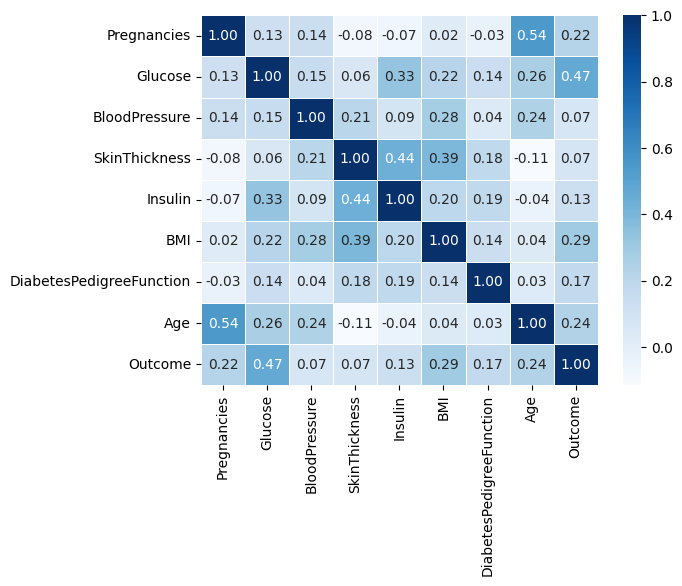

In [59]:
sns.heatmap(data = df.corr() , annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [56]:
#당뇨병을 기준으로 상관계수를 확인한다
outComeCorr = corr.Outcome
outComeCorr.sort_values(ascending=False) #상관계수가 큰 값이 연관성이 높기때문에 내림차순으로 정렬해본다

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

OutCome을 기준으로 뚜렷한 상관관계(0.466581)를 가지는 변수는 혈중 포도당 농도이고 무상관에 해당하는 변수는 피부 두께와 혈압이었다. 대부분의 변수들은 약한 상관관계를 보이기때문에 애초에 수식적으로 아주 깔끔한 예측은 힘들 것으로 예상된다.
일단 무상관을 가지는 변수 피부 두께와 혈압을 제거한 후 다시 모델예측을 해보겠다.

In [64]:
df2 = df.drop(['SkinThickness','BloodPressure' ], axis=1)
y = df2.Outcome
x = df2.drop(['Outcome'], axis=1)

#위의 1-200사이의 k값을 반복한 동일한 랜덤 시드의 데이터로 진행한다
train_input, test_input, train_label, test_label = train_test_split(x,y, test_size = 0.3,random_state=2)

def knn_kValue_print_test_accuracy(k):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_input, train_label)
  predict_label = knn.predict(test_input)
  print('k=', k, end=" ")
  print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))

for i in range(1,201):
  knn_kValue_print_test_accuracy(i)

k= 1 test accuracy 0.67
k= 2 test accuracy 0.72
k= 3 test accuracy 0.73
k= 4 test accuracy 0.73
k= 5 test accuracy 0.76
k= 6 test accuracy 0.75
k= 7 test accuracy 0.77
k= 8 test accuracy 0.75
k= 9 test accuracy 0.76
k= 10 test accuracy 0.76
k= 11 test accuracy 0.76
k= 12 test accuracy 0.77
k= 13 test accuracy 0.76
k= 14 test accuracy 0.74
k= 15 test accuracy 0.76
k= 16 test accuracy 0.77
k= 17 test accuracy 0.76
k= 18 test accuracy 0.77
k= 19 test accuracy 0.76
k= 20 test accuracy 0.76
k= 21 test accuracy 0.76
k= 22 test accuracy 0.77
k= 23 test accuracy 0.76
k= 24 test accuracy 0.77
k= 25 test accuracy 0.78
k= 26 test accuracy 0.78
k= 27 test accuracy 0.77
k= 28 test accuracy 0.76
k= 29 test accuracy 0.77
k= 30 test accuracy 0.77
k= 31 test accuracy 0.77
k= 32 test accuracy 0.78
k= 33 test accuracy 0.77
k= 34 test accuracy 0.77
k= 35 test accuracy 0.77
k= 36 test accuracy 0.77
k= 37 test accuracy 0.77
k= 38 test accuracy 0.77
k= 39 test accuracy 0.77
k= 40 test accuracy 0.77
k= 41 tes

무상관의 변수를 제거 하였더니 육안상으로도 유사도 분포가 평균적으로 오른 것을 볼수 있다.

df2 데이터를 기반으로 랜덤 시드를 계속 바꿔 보면서 이제 적당한 k값의 범위가 어떤 것인지 알아보자

In [78]:
#랜덤 시드를 0-100까지 반복하여 k값의 평균 정확도를 구한다
#x축은 k값, y축은 평균 정확도로 그래프를 그린다
#k값은 1-200사이다

def knn_mean_test_accuracy(k, randomRepeat):
  total = 0
  for i in range(randomRepeat+1):
    train_input, test_input, train_label, test_label = train_test_split(x,y, test_size = 0.3,random_state=i)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_input, train_label)
    predict_label = knn.predict(test_input)
    total = total + np.mean(test_label == predict_label)
  return total/(randomRepeat+1)

graphX = []
graphY = []
for i in range(1, 201):
  graphX.append(i)
  graphY.append(knn_mean_test_accuracy(i, 100))

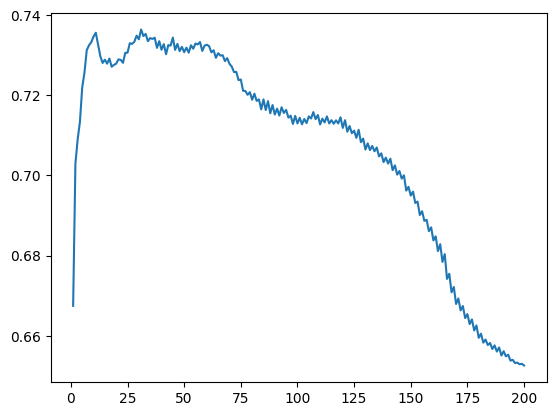

In [79]:
from matplotlib import pyplot as plt

plt.plot(graphX,graphY)
plt.show()

가능한 k의 범위가 매우 넓은 것을 확인 할 수 있다. 6-50 사이의 값이면 정확도 0.73정도를 가지는 것을 확인 할 수 있다.